In [33]:
from yolov5.utils.dataloaders import create_dataloader
from yolov5.utils.general import check_dataset
import yaml

data_dict = check_dataset("/home/daniel/lab_share/projects/CottonFlower2021/flower_dataset/dataset.yaml")
train_path = data_dict["train"]
hyperparams = yaml.load(open("hyp.scratch-low.yml"))
loader = create_dataloader(train_path, 240, 32, 1, augment=True, shuffle=True, hyp=hyperparams)

[01/27/23 13:24:47] WARNING  /tmp/ipykernel_31493/3277707170.py:7: YAMLLoadWarning: calling         ]8;id=585786;file:///home/daniel/.pyenv/versions/3.8.11/lib/python3.8/warnings.py\warnings.py]8;;\:]8;id=325107;file:///home/daniel/.pyenv/versions/3.8.11/lib/python3.8/warnings.py#109\109]8;;\
                             yaml.load() without Loader=... is deprecated, as the default Loader is                
                             unsafe. Please read https://msg.pyyaml.org/load for full details.                     
                               hyperparams = yaml.load(open("hyp.scratch-low.yml"))                                
                                                                                                                   

Scanning /run/user/1001/gvfs/smb-share:server=bsailn2.ad.ufl.edu,share=bsail,user=daniel/projects/CottonFlower2021/flower_dataset/active_1/labels.cache... 2275 images, 629 backgrounds, 0 corrupt: 100%|██████████| 2462/2462 [00:00<?, ?it/s]


In [34]:
_, dataset = loader
len(dataset)

2462

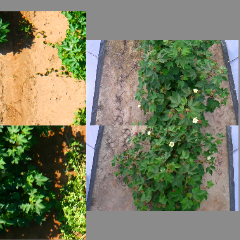

tensor([[0.00000, 0.00000, 0.58034, 0.44182, 0.01420, 0.01354],
        [0.00000, 0.00000, 0.81257, 0.50063, 0.02544, 0.02874],
        [0.00000, 0.00000, 0.81405, 0.37724, 0.01982, 0.02180],
        [0.00000, 0.00000, 0.86955, 0.65803, 0.01916, 0.01850],
        [0.00000, 0.00000, 0.71396, 0.60138, 0.02378, 0.02544],
        [0.00000, 0.00000, 0.62097, 0.55364, 0.01619, 0.02048],
        [0.00000, 0.00000, 0.81670, 0.58139, 0.01057, 0.01057]])

In [38]:
from PIL import Image

image, label, _, _ = dataset[0]

display(Image.fromarray(image.permute((1, 2, 0)).numpy()))
display(label)

In [48]:
import torch

boxes = label[:, 2:]
sizes_tiled = torch.as_tensor(image.shape)[1:].tile(2)
boxes_px = boxes * sizes_tiled
boxes_px

tensor([[139.28134, 106.03795,   3.40913,   3.25053],
        [195.01593, 120.15003,   6.10463,   6.89751],
        [195.37274,  90.53842,   4.75688,   5.23257],
        [208.69199, 157.92749,   4.59825,   4.43974],
        [171.35059, 144.33078,   5.70825,   6.10461],
        [149.03287, 132.87466,   3.88481,   4.91542],
        [196.00705, 139.53432,   2.53705,   2.53702]])

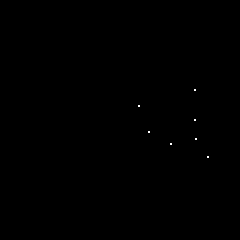

In [85]:
from torchvision.utils import draw_keypoints

keypoints = boxes_px[None, :, :]
zeros = torch.zeros_like(image)
with_keypoints = draw_keypoints(zeros, keypoints, radius=0.5, colors=(255, 255, 255))

display(Image.fromarray(with_keypoints.permute((1, 2, 0)).numpy()))

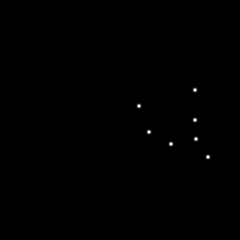

In [118]:
from torchvision.transforms.functional import gaussian_blur
import numpy as np

heatmap = gaussian_blur(with_keypoints, 5)
heatmap = heatmap.to(torch.float)
heatmap /= heatmap.max()
heatmap = (heatmap * 255).to(torch.uint8)

display(Image.fromarray(heatmap.permute((1, 2, 0)).numpy()))

In [117]:
heatmap.max()

tensor(255, dtype=torch.uint8)

tensor(21420)